# Расчёт балки по предельным состояниям. Случай распределённой нагрузки

(Введение в нелинейную строительную механику О. Л. Рудных, стр 88, пример 1.)


Для заданной схемы требуется определить места образования пластических шарниров, предельное значение нагрузки $q$ выраженное через предельный момент

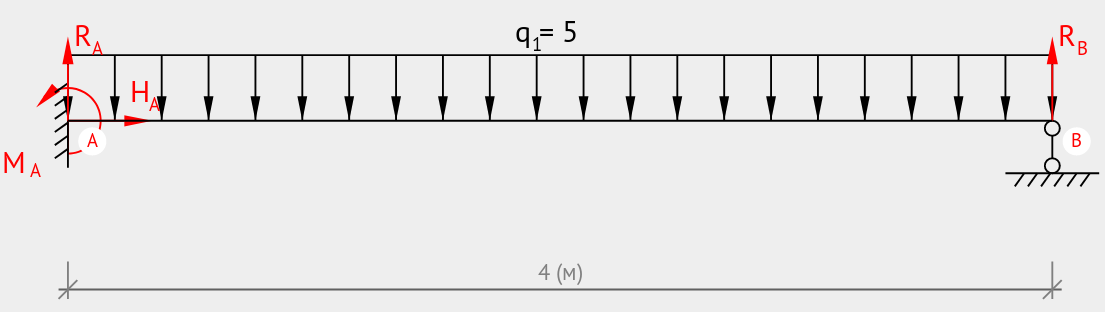

- Это статически неопределимая балка, значит возникает 2 алстических шарнира
- Паластическое шарниры: 
    - в точке А, 
    - где-то в пролёте AB
- Изобразим реакции связей

- Запишем уравнение для внутреннего момента с координатой z (отсчитывается от т. B)

(1) &nbsp; $ M = R_B \cdot z - q \cdot \frac{z}{2} \cdot z $

- Найдём макссимум M продифференцировав M по z

$ R_B - q \cdot z = 0 $

Максимальный момент будет при:

$ R_B = q \cdot z$

(2) &nbsp; $ z = \frac{R_B}{q}$

Подставим в формулу (1)

$ M_{max} = \frac{R_B^2}{q} - q \frac{R_B^2}{2}   $


(3) &nbsp; $ q \ge \frac{R_B^2}{2 M_{пр}}$

(4) &nbsp; $ q \le \frac{2 M_{пр} }{l^2} +  \frac{2 R_B}{l}   $

In [1]:
# для запуска в mybinder.com:
# установка модулей
# убрать символ # в начале следующих строк и запустить ячейку
# !pip install numpy
# !pip install scipy
# !pip install seaborn

In [2]:
import numpy as np
from scipy.optimize import linprog, minimize
from matplotlib.pyplot import *  # для построения графиков

# выводить 4 знака после запятой, выводить маленькие (по модулю) числа как 0
np.set_printoptions(precision=2, suppress=True)

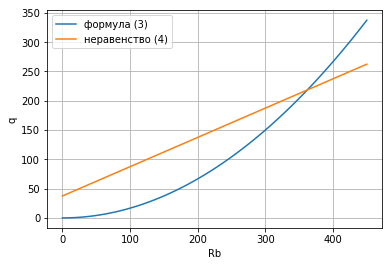

In [62]:
absM = 300  # kH*m
l = 4  # m

# сделаем из неравенств (3) и (4) равенства и построим графики в координатах Rb - q
# для этого запишем q как функцию от Rb: q = f(Rb):
q1 = lambda Rb: Rb**2 / 2 / absM       # формула (3)
q2 = lambda Rb: 2*absM/l**2 + 2*Rb/l   # формула (4)

# для построения графика по точкам создадим набор из значений (100 штук) Rb от 0 до 450
Rb = np.linspace(0, 450, 100)

# построим графики: первый параметр - набор абсцисс, второй - набор значений ординат, третий - подпись к графику
plot(Rb, q1(Rb), label='формула (3)')
plot(Rb, q2(Rb), label='неравенство (4)')
xlabel('Rb')   # подпись к оси абсцисс
ylabel('q')    # подпись к оси ординат
legend(loc='best')   # добавить легенду
grid()    # показать координатную сетку

Два графика выше определяют область значений в которой нужно максимизировать целевую функцию

- неравенство (3) ограничивает область выше синей кривой
- неравенство (4) ограничивает область ниже оранжевой прямой


Так как целевая функция требует максимизировать q, то просто выберем в области заданой неравенствами точку с наибольшим значением q.

Это точка пересечения двух графиков. Найдём её

$ \frac{R_B^2}{2 M_{пр}} = \frac{2 M_{пр} }{l^2} +  \frac{2 R_B}{l}   $

Это уравнение имеет два решения:

$ R \approx 4.82843 M_{пр}/l $

$ R \approx -0.828427 M_{пр}/l $

Второй вариант очевидно не подходит для точки пересечения кривых изображённый на графике.

Превратив 2 в равенство, подставим полученное значение $ R_B $ и найдём q:

$ q \approx \frac{11.6 M_{пр}}{l^2} $

Кроме нагрузки требуется ещё и определить место образования пластического шарнира. Определим z из уравнения (4):

$ z \approx 0.414 l$

#### Ответ

$ q \approx \frac{11.6 M_{пр}}{l^2} $

Пластические шарниры образуются в т A и на расстояннии z от точки B( z отсчитывается влево)

$ z \approx 0.414 l$


## Решение кинематическим способом
...